# Exploiration de la dataset FD001


## Importation des bibliothèques et données pour faire de l'analyse descriptive

In [1]:
#pip install xgboost
#importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importation de bibliothèque Skelearn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import absolute_mean_error

# Importation des données : données d'entrainement(data_train),données test (data_test), données de validation (data_RUL)
data_train= pd.read_csv("train_FD004.txt",sep=" ",header=None)
data_test = pd.read_csv("test_FD004.txt",sep=" ",header=None)
data_RUL = pd.read_csv("RUL_FD004.txt",sep=" ",header=None)

In [2]:
#Visionnage de la tête de la dataset d'entrainement
data_train.head()

0   1        2       3      4       5       6        7        8     9   \
0   1   1  42.0049  0.8400  100.0  445.00  549.68  1343.43  1112.93  3.91   
1   1   2  20.0020  0.7002  100.0  491.19  606.07  1477.61  1237.50  9.35   
2   1   3  42.0038  0.8409  100.0  445.00  548.95  1343.12  1117.05  3.91   
3   1   4  42.0000  0.8400  100.0  445.00  548.70  1341.24  1118.03  3.91   
4   1   5  25.0063  0.6207   60.0  462.54  536.10  1255.23  1033.59  7.05   

   ...       18       19    20   21    22      23     24       25  26  27  
0  ...  8074.83   9.3335  0.02  330  2212  100.00  10.62   6.3670 NaN NaN  
1  ...  8046.13   9.1913  0.02  361  2324  100.00  24.37  14.6552 NaN NaN  
2  ...  8066.62   9.4007  0.02  329  2212  100.00  10.48   6.4213 NaN NaN  
3  ...  8076.05   9.3369  0.02  328  2212  100.00  10.54   6.4176 NaN NaN  
4  ...  7865.80  10.8366  0.02  305  1915   84.93  14.03   8.6754 NaN NaN  

[5 rows x 28 columns]

In [3]:
#vionnage de la summary de la dataset d'entrainement
data_train.describe()

0             1             2             3             4   \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181    134.311417     23.999823      0.571347     94.031576   
std       71.995350     89.783389     14.780722      0.310703     14.251954   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       60.000000     62.000000     10.004600      0.250700    100.000000   
50%      126.000000    123.000000     25.001400      0.700000    100.000000   
75%      185.000000    191.000000     41.998100      0.840000    100.000000   
max      249.000000    543.000000     42.008000      0.842000    100.000000   

                 5             6             7             8             9   \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.342647    106.167598    119.327591      3.622872   
min      445.000000    535.480000   1242.670000   1024.420000      3.910000   
25%      445.000000    549.330000   1350.550000   1119.490000      3.910000   
50%      462.540000    555.740000   1367.680000   1136.920000      7.050000   
75%      491.190000    607.070000   1497.420000   1302.620000     10.520000   
max      518.670000    644.420000   1613.000000   1440.770000     14.620000   

       ...            18            19            20            21  \
count  ...  61249.000000  61249.000000  61249.000000  61249.000000   
mean   ...   8067.811812      9.285604      0.023252    347.760029   
std    ...     85.670543      0.750374      0.004685     27.808283   
min    ...   7845.780000      8.175700      0.020000    302.000000   
25%    ...   8062.630000      8.648000      0.020000    330.000000   
50%    ...   8083.810000      9.255600      0.020000    334.000000   
75%    ...   8128.350000      9.365800      0.030000    368.000000   
max    ...   8261.650000     11.066300      0.030000    399.000000   

                 22            23            24            25   26   27  
count  61249.000000  61249.000000  61249.000000  61249.000000  0.0  0.0  
mean    2228.613283     97.751396     20.864333     12.518995  NaN  NaN  
std      145.472491      5.369424      9.936396      5.962697  NaN  NaN  
min     1915.000000     84.930000     10.160000      6.084300  NaN  NaN  
25%     2212.000000    100.000000     10.940000      6.566100  NaN  NaN  
50%     2223.000000    100.000000     14.930000      8.960100  NaN  NaN  
75%     2324.000000    100.000000     28.560000     17.135500  NaN  NaN  
max     2388.000000    100.000000     39.890000     23.885200  NaN  NaN  

[8 rows x 28 columns]

In [4]:
#vionnage de la summary de la dataset test
data_test.describe()

0             1             2             3             4   \
count  41214.000000  41214.000000  41214.000000  41214.000000  41214.000000   
mean     120.006017    108.739094     24.115207      0.574725     94.072888   
std       71.685208     83.717459     14.714512      0.308868     14.211218   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       57.000000     43.000000     10.004700      0.250700    100.000000   
50%      118.000000     91.000000     25.001500      0.700000    100.000000   
75%      181.000000    155.000000     41.998100      0.840000    100.000000   
max      248.000000    486.000000     42.008000      0.842000    100.000000   

                 5             6             7             8             9   \
count  41214.000000  41214.000000  41214.000000  41214.000000  41214.000000   
mean     472.711616    579.069264   1414.951596   1197.321054      8.003346   
std       26.321455     37.129671    105.423125    118.206367      3.602107   
min      445.000000    535.420000   1240.940000   1024.900000      3.910000   
25%      445.000000    549.200000   1348.590000   1116.800000      3.910000   
50%      462.540000    555.540000   1364.630000   1130.300000      7.050000   
75%      491.190000    606.910000   1494.990000   1299.440000     10.520000   
max      518.670000    643.940000   1608.050000   1429.460000     14.620000   

       ...            18            19            20            21  \
count  ...  41214.000000  41214.000000  41214.000000  41214.000000   
mean   ...   8063.206813      9.284664      0.023029    346.976319   
std    ...     84.126742      0.744338      0.004595     27.604875   
min    ...   7849.800000      8.204000      0.020000    302.000000   
25%    ...   8060.970000      8.636200      0.020000    330.000000   
50%    ...   8079.705000      9.261050      0.020000    334.000000   
75%    ...   8125.830000      9.352375      0.030000    368.000000   
max    ...   8196.800000     11.017000      0.030000    397.000000   

                 22            23            24            25   26   27  
count  41214.000000  41214.000000  41214.000000  41214.000000  0.0  0.0  
mean    2228.560392     97.766960     20.798613     12.479669  NaN  NaN  
std      144.868684      5.354077      9.880486      5.928765  NaN  NaN  
min     1915.000000     84.930000     10.190000      6.145300  NaN  NaN  
25%     2212.000000    100.000000     10.890000      6.538275  NaN  NaN  
50%     2223.000000    100.000000     14.930000      8.958850  NaN  NaN  
75%     2324.000000    100.000000     28.580000     17.148200  NaN  NaN  
max     2388.000000    100.000000     39.710000     23.829800  NaN  NaN  

[8 rows x 28 columns]

In [5]:
#vionnage de la summary de la dataset de validation
data_RUL.describe()

0    1
count  248.000000  0.0
mean    86.552419  NaN
std     54.634054  NaN
min      6.000000  NaN
25%     36.000000  NaN
50%     88.000000  NaN
75%    126.750000  NaN
max    195.000000  NaN

## Analyse descriptive

In [6]:
# on enlève les colonnes qui ne nous apporte aucune information concernant le cycles  à savoir les colonnes 
# 26 et 27 pour les données test et ceului d'entrainement 
#et la conlone 1 de la data RUL

data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [7]:
# on affecte des noms aux columns de la dataset Test et entrainement
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

data_train.columns=columns
data_test.columns=columns

In [8]:
data_train.head()

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2     T24  \
0            1               1    42.0049     0.8400  100.0  445.00  549.68   
1            1               2    20.0020     0.7002  100.0  491.19  606.07   
2            1               3    42.0038     0.8409  100.0  445.00  548.95   
3            1               4    42.0000     0.8400  100.0  445.00  548.70   
4            1               5    25.0063     0.6207   60.0  462.54  536.10   

       T30      T50    P2  ...     phi      NRf      NRc      BPR  farB  \
0  1343.43  1112.93  3.91  ...  129.78  2387.99  8074.83   9.3335  0.02   
1  1477.61  1237.50  9.35  ...  312.59  2387.73  8046.13   9.1913  0.02   
2  1343.12  1117.05  3.91  ...  129.62  2387.97  8066.62   9.4007  0.02   
3  1341.24  1118.03  3.91  ...  129.80  2388.02  8076.05   9.3369  0.02   
4  1255.23  1033.59  7.05  ...  164.11  2028.08  7865.80  10.8366  0.02   

   htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0      330    2212     100.00  10.62   6.3670  
1      361    2324     100.00  24.37  14.6552  
2      329    2212     100.00  10.48   6.4213  
3      328    2212     100.00  10.54   6.4176  
4      305    1915      84.93  14.03   8.6754  

[5 rows x 26 columns]

In [9]:
#vionnage du resumé de la dataset d'entrainement

data_train.describe()

unit_number  time_in_cycles     setting_1     setting_2           TRA  \
count  61249.000000    61249.000000  61249.000000  61249.000000  61249.000000   
mean     124.325181      134.311417     23.999823      0.571347     94.031576   
std       71.995350       89.783389     14.780722      0.310703     14.251954   
min        1.000000        1.000000      0.000000      0.000000     60.000000   
25%       60.000000       62.000000     10.004600      0.250700    100.000000   
50%      126.000000      123.000000     25.001400      0.700000    100.000000   
75%      185.000000      191.000000     41.998100      0.840000    100.000000   
max      249.000000      543.000000     42.008000      0.842000    100.000000   

                 T2           T24           T30           T50            P2  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean     472.882435    579.420056   1417.896600   1201.915359      8.031626   
std       26.436832     37.342647    106.167598    119.327591      3.622872   
min      445.000000    535.480000   1242.670000   1024.420000      3.910000   
25%      445.000000    549.330000   1350.550000   1119.490000      3.910000   
50%      462.540000    555.740000   1367.680000   1136.920000      7.050000   
75%      491.190000    607.070000   1497.420000   1302.620000     10.520000   
max      518.670000    644.420000   1613.000000   1440.770000     14.620000   

       ...           phi           NRf           NRc           BPR  \
count  ...  61249.000000  61249.000000  61249.000000  61249.000000   
mean   ...    266.735665   2334.427590   8067.811812      9.285604   
std    ...    138.479109    128.197859     85.670543      0.750374   
min    ...    128.310000   2027.570000   7845.780000      8.175700   
25%    ...    134.520000   2387.910000   8062.630000      8.648000   
50%    ...    183.450000   2388.060000   8083.810000      9.255600   
75%    ...    371.400000   2388.170000   8128.350000      9.365800   
max    ...    537.490000   2390.490000   8261.650000     11.066300   

               farB       htBleed        Nf_dmd     PCNfR_dmd           W31  \
count  61249.000000  61249.000000  61249.000000  61249.000000  61249.000000   
mean       0.023252    347.760029   2228.613283     97.751396     20.864333   
std        0.004685     27.808283    145.472491      5.369424      9.936396   
min        0.020000    302.000000   1915.000000     84.930000     10.160000   
25%        0.020000    330.000000   2212.000000    100.000000     10.940000   
50%        0.020000    334.000000   2223.000000    100.000000     14.930000   
75%        0.030000    368.000000   2324.000000    100.000000     28.560000   
max        0.030000    399.000000   2388.000000    100.000000     39.890000   

                W32  
count  61249.000000  
mean      12.518995  
std        5.962697  
min        6.084300  
25%        6.566100  
50%        8.960100  
75%       17.135500  
max       23.885200  

[8 rows x 26 columns]

In [10]:
#visionnage de la la structuration de la dataset d'entrainement
data_train_cycles = data_train.loc[:, 'unit_number':'time_in_cycles']
data_train_cycles

unit_number  time_in_cycles
0                1               1
1                1               2
2                1               3
3                1               4
4                1               5
...            ...             ...
61244          249             251
61245          249             252
61246          249             253
61247          249             254
61248          249             255

[61249 rows x 2 columns]

In [11]:
#Visionnage des lignes uniques de la dataset d'entraînement  
print("Unit_number " , data_train.unit_number.unique())

Unit_number  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

In [12]:
#vionnage du resumé des cycles maximales des 100 moteur de la dataset data_train 
data_train_max= data_train.groupby('unit_number')['time_in_cycles'].max().reset_index()
data_train_max.describe()


unit_number  time_in_cycles
count   249.000000       249.00000
mean    125.000000       245.97992
std      72.024301        73.11080
min       1.000000       128.00000
25%      63.000000       190.00000
50%     125.000000       234.00000
75%     187.000000       290.00000
max     249.000000       543.00000

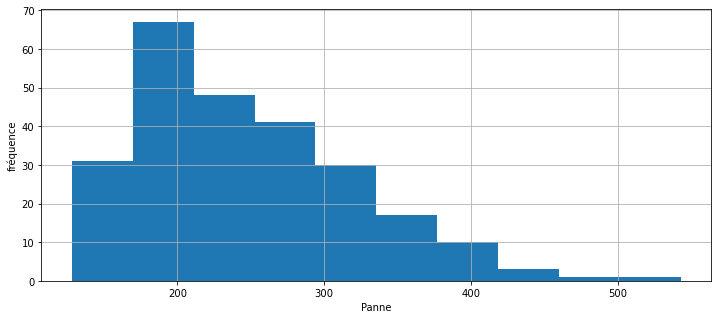

In [13]:
# histogramme des cycles maximales des 100 moteur de la dataset data_train 
data_train_max['time_in_cycles'].hist(bins=10, figsize=(12,5))
plt.xlabel('Panne')
plt.ylabel('fréquence')
plt.show()

### Calcul du RUL dans la dataset data_train (données d'entraînement)

In [14]:
# on regroupe la data train par moteur(unit_number ) et on récupére le maximun de chaque group
#L'ensemble est stocké dans data_train_cycles_panne

data_train_cycles_panne = pd.DataFrame(data_train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
data_train_cycles_panne.columns = ['unit_number', 'failure']

# une fois la nouvelle data data_train_cycles_panne créée on la merge avec la data de depart, ici la data_train 
#afin de calculer la RUL

data_train=data_train.merge(data_train_cycles_panne,on=['unit_number'],how='left')
#calcul du RUL dans la dataset data_train
data_train['RUL']=data_train['failure']-data_train["time_in_cycles"]
data_train

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2  \
0                1               1    42.0049     0.8400  100.0  445.00   
1                1               2    20.0020     0.7002  100.0  491.19   
2                1               3    42.0038     0.8409  100.0  445.00   
3                1               4    42.0000     0.8400  100.0  445.00   
4                1               5    25.0063     0.6207   60.0  462.54   
...            ...             ...        ...        ...    ...     ...   
61244          249             251     9.9998     0.2500  100.0  489.05   
61245          249             252     0.0028     0.0015  100.0  518.67   
61246          249             253     0.0029     0.0000  100.0  518.67   
61247          249             254    35.0046     0.8400  100.0  449.44   
61248          249             255    42.0030     0.8400  100.0  445.00   

          T24      T30      T50     P2  ...      NRc      BPR  farB  htBleed  \
0      549.68  1343.43  1112.93   3.91  ...  8074.83   9.3335  0.02      330   
1      606.07  1477.61  1237.50   9.35  ...  8046.13   9.1913  0.02      361   
2      548.95  1343.12  1117.05   3.91  ...  8066.62   9.4007  0.02      329   
3      548.70  1341.24  1118.03   3.91  ...  8076.05   9.3369  0.02      328   
4      536.10  1255.23  1033.59   7.05  ...  7865.80  10.8366  0.02      305   
...       ...      ...      ...    ...  ...      ...      ...   ...      ...   
61244  605.33  1516.36  1315.28  10.52  ...  8185.69   8.4541  0.03      372   
61245  643.42  1598.92  1426.77  14.62  ...  8185.47   8.2221  0.03      396   
61246  643.68  1607.72  1430.56  14.62  ...  8193.94   8.2525  0.03      395   
61247  555.77  1381.29  1148.18   5.48  ...  8125.64   9.0515  0.02      337   
61248  549.85  1369.75  1147.45   3.91  ...  8144.33   9.1207  0.02      333   

       Nf_dmd  PCNfR_dmd    W31      W32  failure  RUL  
0        2212     100.00  10.62   6.3670      321  320  
1        2324     100.00  24.37  14.6552      321  319  
2        2212     100.00  10.48   6.4213      321  318  
3        2212     100.00  10.54   6.4176      321  317  
4        1915      84.93  14.03   8.6754      321  316  
...       ...        ...    ...      ...      ...  ...  
61244    2319     100.00  29.11  17.5234      255    4  
61245    2388     100.00  39.38  23.7151      255    3  
61246    2388     100.00  39.78  23.8270      255    2  
61247    2223     100.00  15.26   9.0774      255    1  
61248    2212     100.00  10.66   6.4341      255    0  

[61249 rows x 28 columns]

## Sélection des variables

### Corrélation entre les variables explicatives et la variable d'intérêt ici RUL du unit ayant le cycle le plus long la dataset d'entrainement

In [18]:
# matrice de correlation entre "RUL" et les paramètres opératoires
# on choisi ici le moteur qui a le cycle le plus long pour mieux étudier les corrélation 
# On utilise la fonction idxmax pour acceder à l'indice ayant  la valeur max 
# La méthode loc est utilisé ici pour avoir accès à cet id

id_moteurPerf= data_train.loc[data_train['time_in_cycles'].idxmax(),['unit_number','time_in_cycles']]
# L'id trouvé est la 118

# on cherche desormais à soir le nombre de ligne du moteur ayant l'id 118

moteur_perf= data_train.loc[data_train['unit_number']==118]
#id_moteurPerf

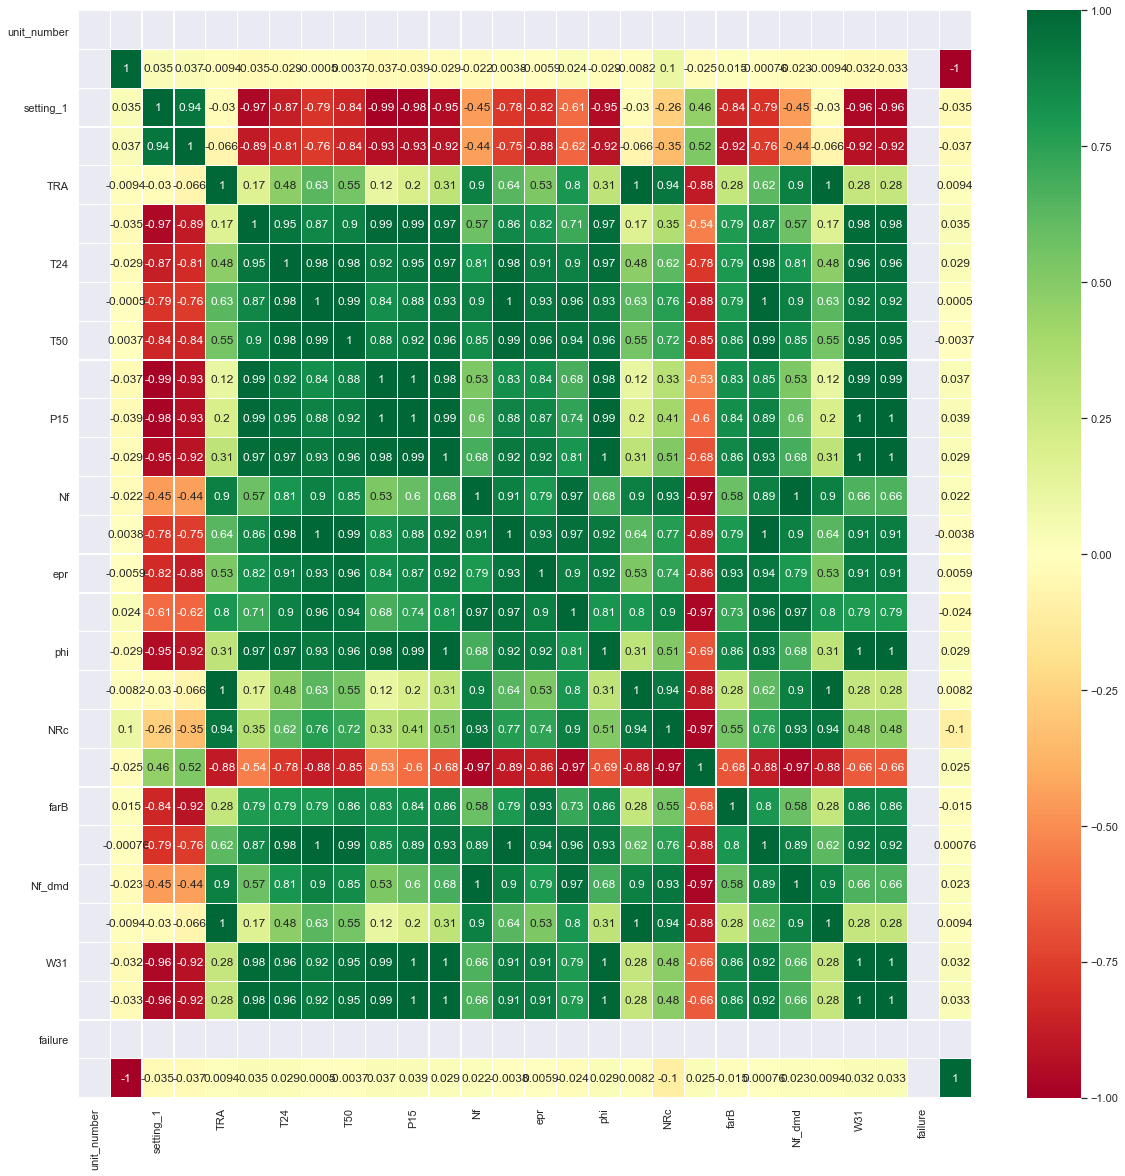

In [19]:
# matrice de correlation 
sns.set()
sns.heatmap(moteur_perf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()
# attention seulement les noms 1 colonnes sur 2 sont imprimés

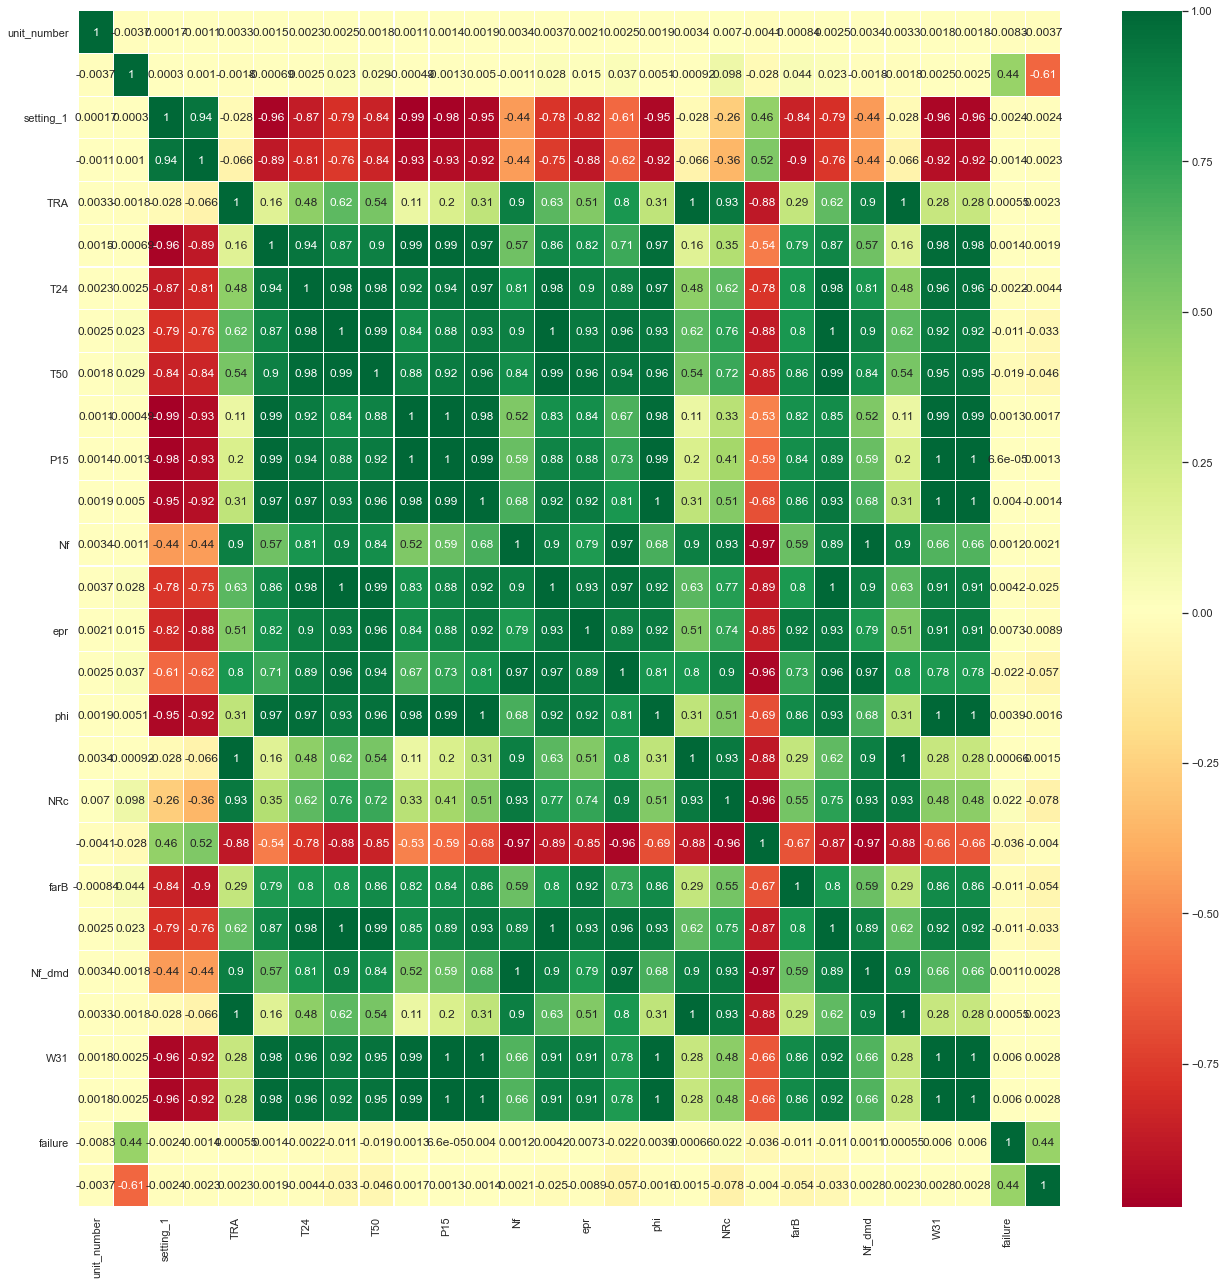

In [15]:
sns.set()
#data_train.drop(columns=[26,27],inplace=True)

sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(22,22)
plt.show()

### Corrélation entre les variables explicatives et la variable d'intérêt ici  RUL de la dataset d'entrainement

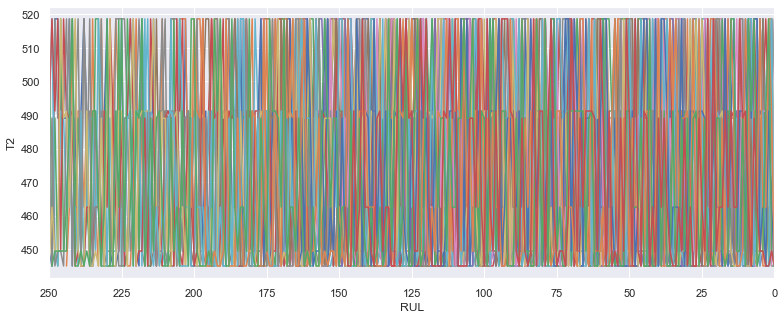

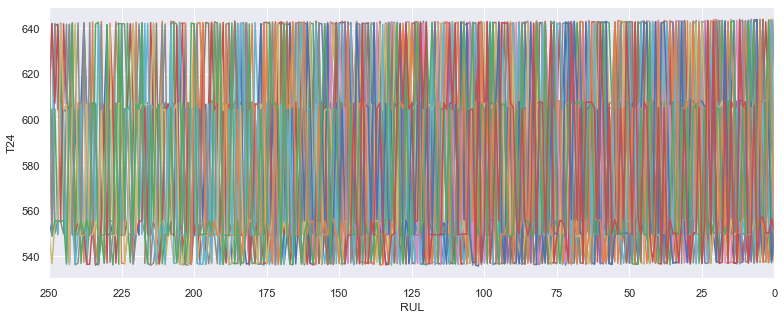

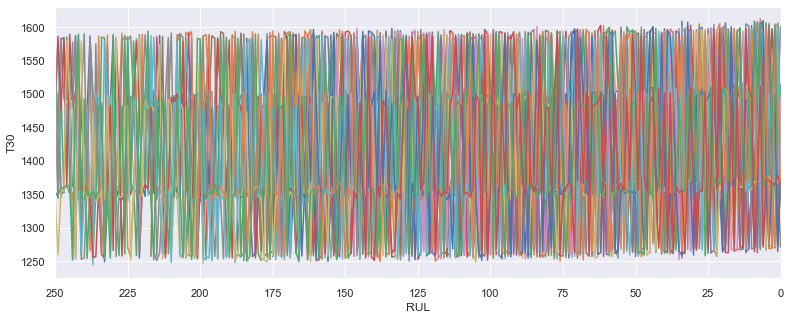

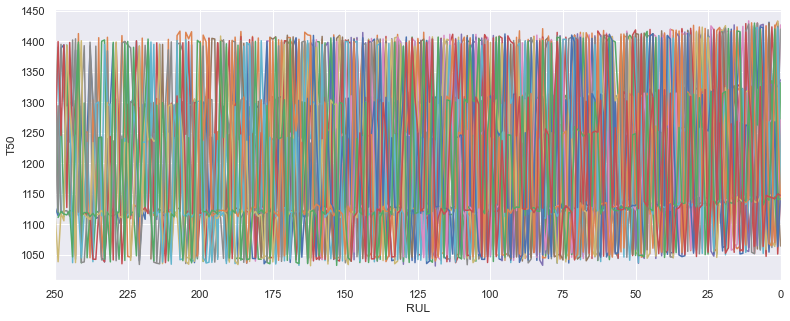

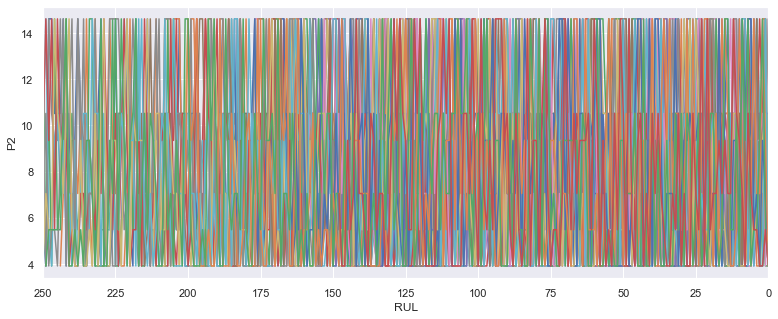

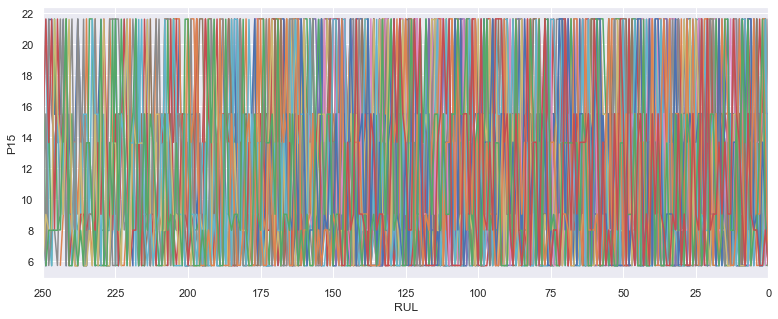

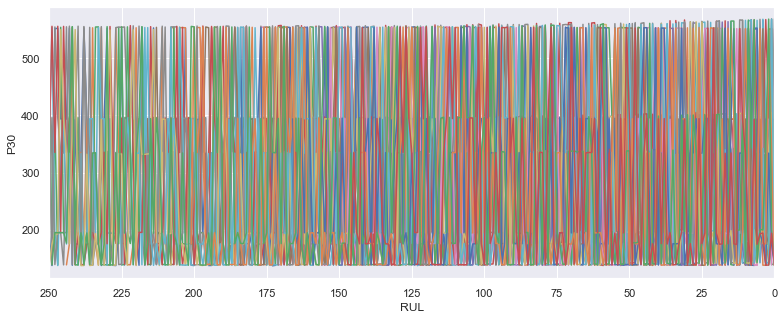

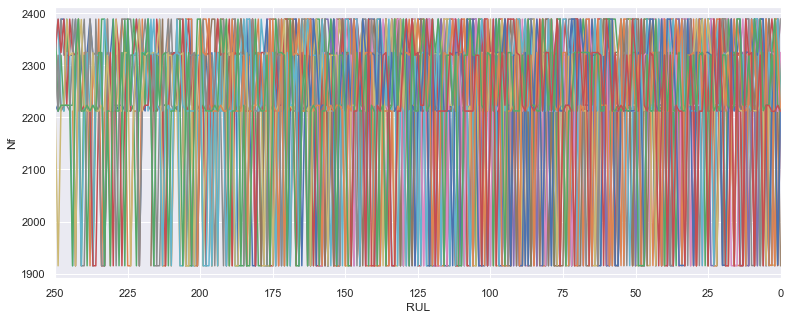

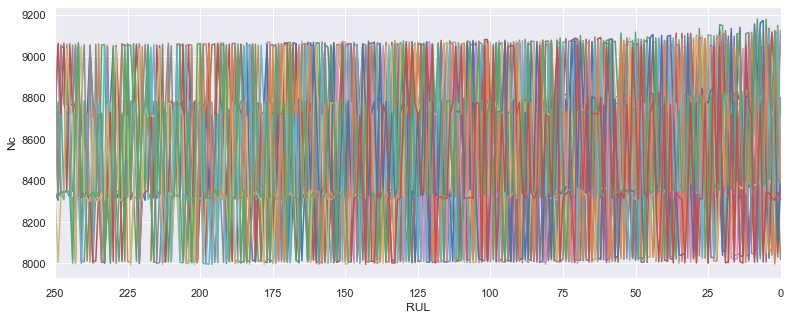

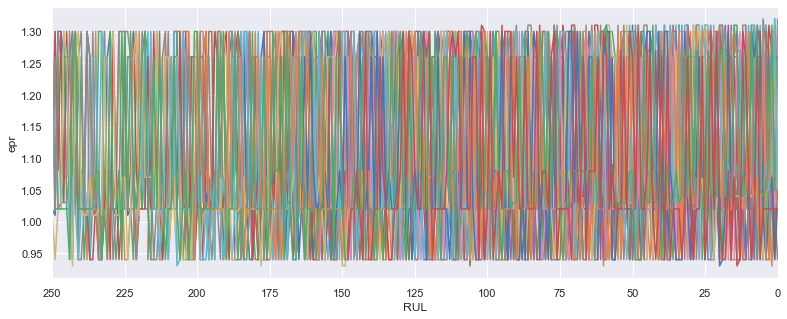

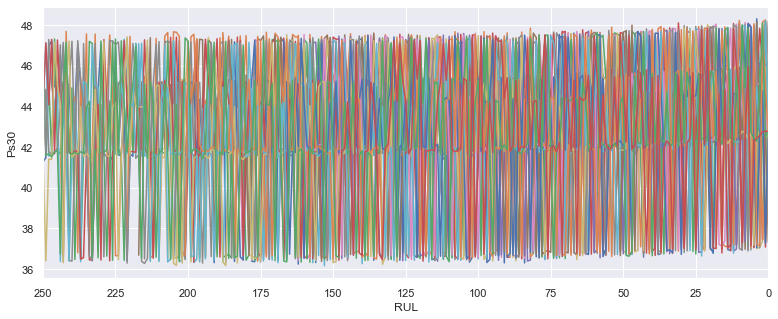

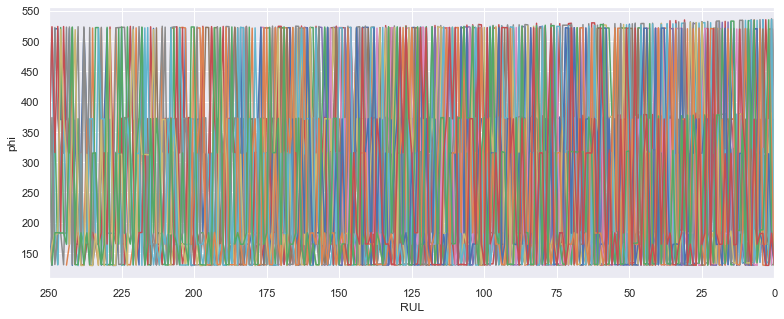

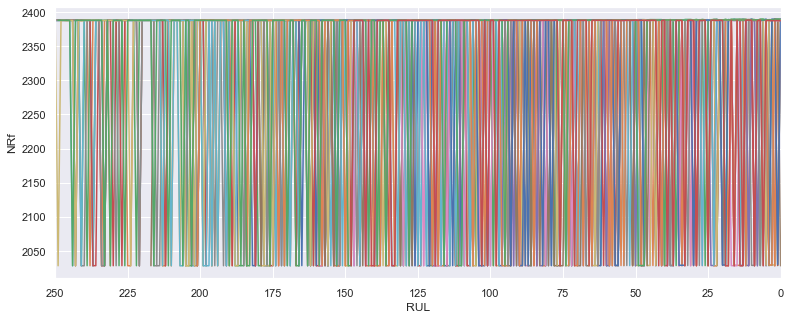

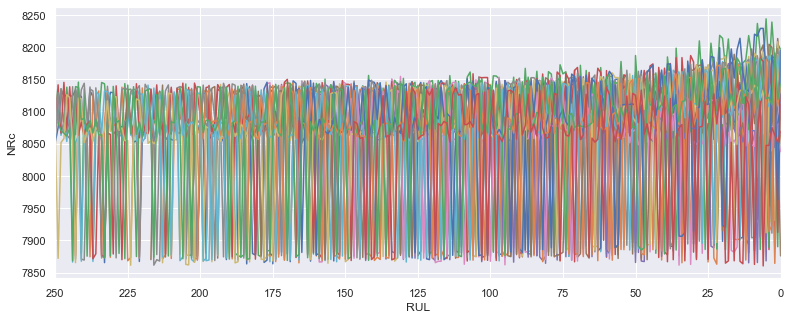

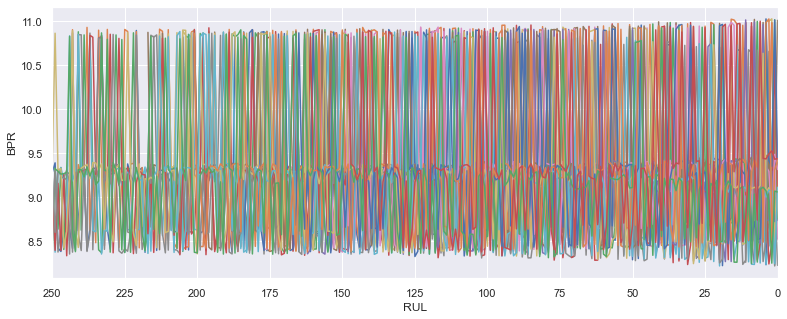

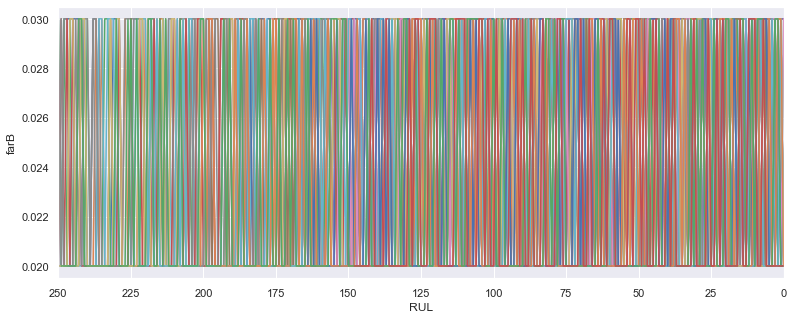

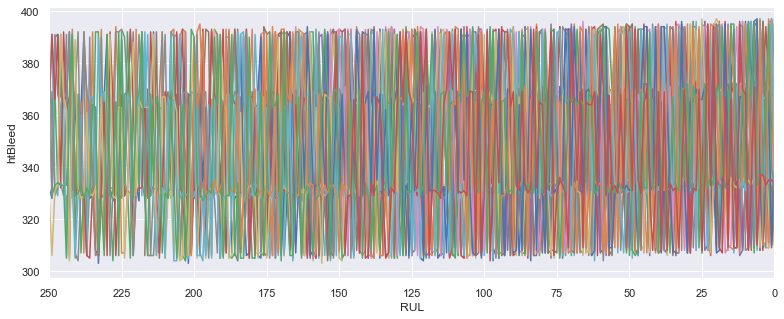

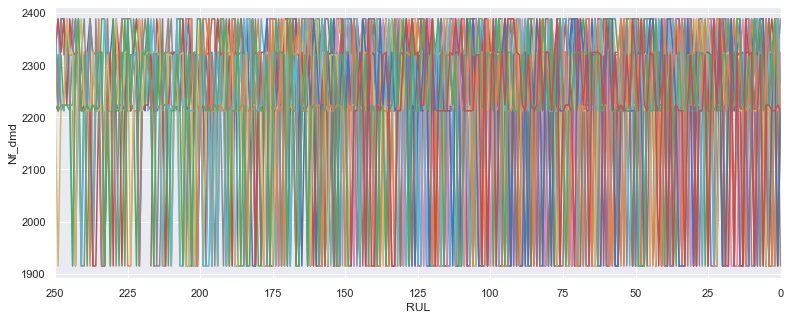

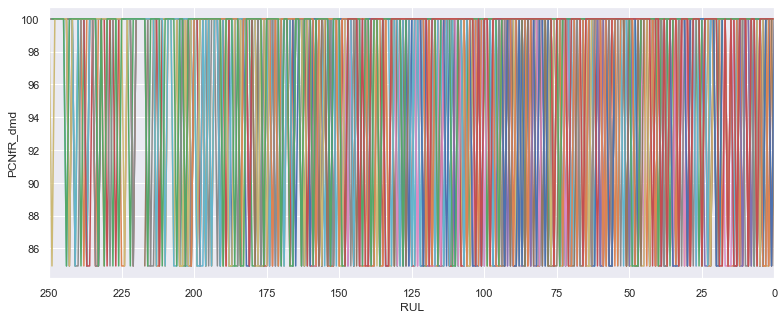

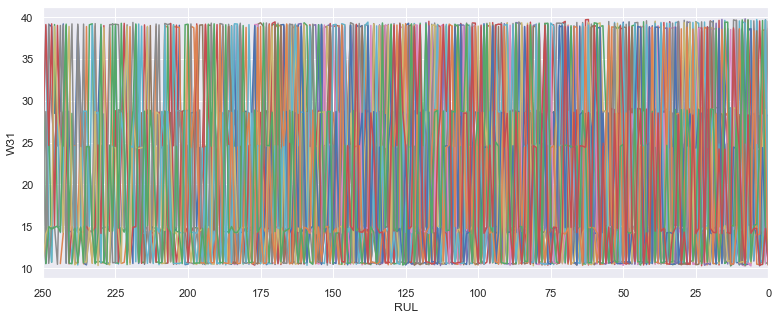

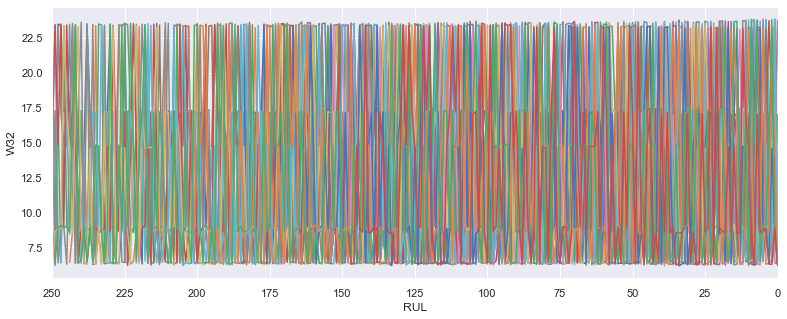

In [24]:
#varaiation du RUL des plusieur moteurs en fonction des capteurs
# on selectionnera uniquement 
capteurs=  ['T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

# on a bien 21 capteurs ( des outputs de 14 inputs)
#len(capteur)

def plot_sensor(capteur):
    plt.figure(figsize=(13,5))
    for i in data_train['unit_number'].unique():
       #ON TRACE ICI uniquement les moteurs dont les numéros sont multiples de 10
        if (i % 10 == 0):   
            plt.plot('RUL', capteur, 
                     data=data_train[data_train['unit_number']==i])
            # Nous inversons l'axe X afin que RUL diminue le long de l'axe, avec un RUL de zéro indiquant une panne de moteur.
    plt.xlim(250, 0)  
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(capteur)
    plt.xlabel('RUL')
    plt.show()

# on plot le RUL en fonction des capteurs
for capteur in capteurs:
    plot_sensor(capteur)


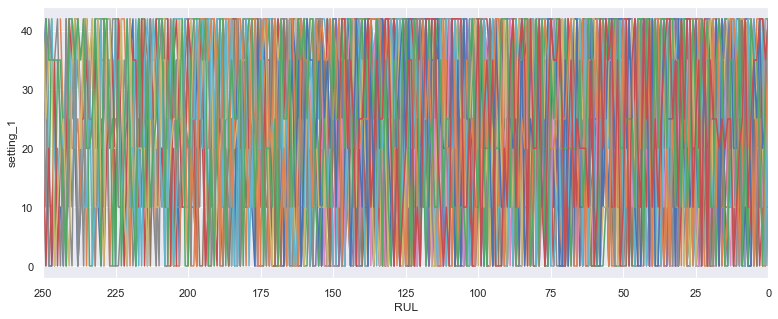

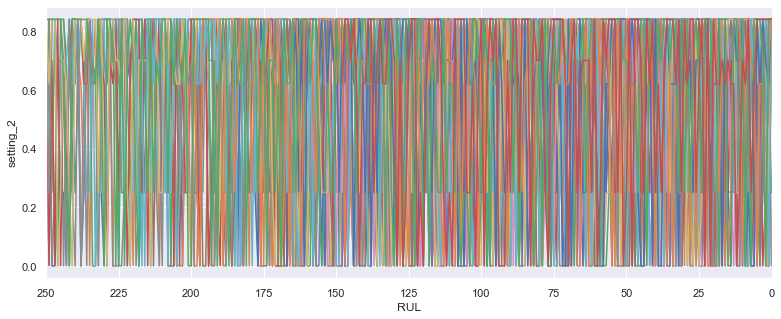

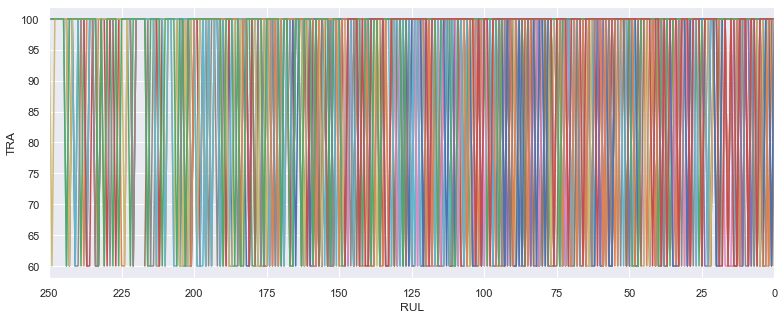

In [25]:
# paramètre de fonctionnement 
param_fonc = ['setting_1','setting_2','TRA']
for parm in param_fonc:
    plot_sensor(parm)

## Calcul de la panne dans la dataset data_test 

In [26]:
# on crée d'abord la colonne unit_number dans les données : data_RUL
columns_RUL = ['RUL_dernierMoteur']
data_RUL.columns = columns_RUL
data_RUL.insert(0, 'unit_number', range(1, 1 + len(data_RUL)))
data_RUL.head()



unit_number  RUL_dernierMoteur
0            1                 22
1            2                 39
2            3                107
3            4                 75
4            5                149

In [27]:
# on fait pareil (cf data_train) pour les données data_test 

# on regroupe la data_test par moteur(unit_number ) et on calcule le maximun de chaque group
data_test_cycles_MAX = pd.DataFrame(data_test.groupby('unit_number')['time_in_cycles'].max()).reset_index()
# on attribue au sein de la data_test_cycles_MAX les noms des colonnes suivantes: ' unit_number' et 'cycles Max '
data_test_cycles_MAX.columns = ['unit_number', 'cyclesMax_interme']
#data_test_cycles_MAX

# on merge tout d'abord la data_test avec la data_RUL précedenment créée pour avoir accèes à la colonne 'RUL' du dernier moteur
#
data_test=data_test.merge(data_RUL,on=['unit_number'],how='left')

# on merge ensuite la data_test avec data_test_cycles_MAX précedenment créée pour avoir accèes à la colonne 'cycles Max '
#Qui servivar à créer la colonnes panne 'Failure'
data_test=data_test.merge(data_test_cycles_MAX,on=['unit_number'],how='left')
# calcul du RUL 
data_test['failure']=data_test['cyclesMax_interme']+data_test['RUL_dernierMoteur']
data_test['RUL']=data_test['failure']-data_test['time_in_cycles']
#data_test.drop(columns=[26,33],axis=1,inplace=True)
#data_train.drop(columns=['RUL_dernierMoteur'],inplace=True)
#,'cyclesMax_interme','failure'
data_test.head()

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2     T24  \
0            1               1    20.0072     0.7000  100.0  491.19  606.67   
1            1               2    24.9984     0.6200   60.0  462.54  536.22   
2            1               3    42.0000     0.8420  100.0  445.00  549.23   
3            1               4    42.0035     0.8402  100.0  445.00  549.19   
4            1               5    35.0079     0.8400  100.0  449.44  555.10   

       T30      T50    P2  ...  farB  htBleed  Nf_dmd  PCNfR_dmd    W31  \
0  1481.04  1227.81  9.35  ...  0.02      362    2324     100.00  24.31   
1  1256.17  1031.48  7.05  ...  0.02      306    1915      84.93  14.36   
2  1340.13  1105.88  3.91  ...  0.02      328    2212     100.00  10.39   
3  1339.70  1107.26  3.91  ...  0.02      328    2212     100.00  10.56   
4  1353.04  1117.80  5.48  ...  0.02      333    2223     100.00  14.85   

       W32  RUL_dernierMoteur  cyclesMax_interme  failure  RUL  
0  14.7007                 22                230      252  251  
1   8.5748                 22                230      252  250  
2   6.4365                 22                230      252  249  
3   6.2367                 22                230      252  248  
4   8.9326                 22                230      252  247  

[5 rows x 30 columns]

In [28]:
#data_train["time_in_cycles"]
data_train_max

unit_number  time_in_cycles
0              1             321
1              2             299
2              3             307
3              4             274
4              5             193
..           ...             ...
244          245             205
245          246             161
246          247             211
247          248             184
248          249             255

[249 rows x 2 columns]

In [29]:
#data_train.to_excel('Entrainement.xlsx')

## Implémentation des modèles sur le jeu de données entraînement

In [30]:

Selection_colonne = ['setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]


#Partionnnement des données

X=data_train[Selection_colonne]
y= data_train['RUL']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

#Fonction evaluation 

def evaluation(y_true, y_pred, label='test'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred)
    #Accuracy = average_precision_score(y_true, y_pred)  
    print('{} set RMSE:{} ,MAE:{}, R2:{}'.format(label, rmse,mae,variance))

### Implémentation de la régression Linéaire

In [31]:
#Instanciation du modèle Lineaire
model=LinearRegression()

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model.fit(X_train,y_train )

#prédiction du modèle 
y_pred_train=model.predict(X_train)

#Evaluation du modèle 
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model.predict(X_valid)
#Evaluation du modèle 
evaluation(y_valid,y_pred_test)

train set RMSE:60.260059533451994 ,MAE:46.02823584165118, R2:0.5501969724260054
test set RMSE:60.40707768087024 ,MAE:46.13682919368606, R2:0.5445412242839127


### Implémentation du RF

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor param_dict
n_estimators = [10,25,40,55,70,85,100] # nombre des arbres
max_depth = [2,3,4,6,8,10,12] # profondeurs des arbres
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

# Instanciation du modèle Random Forest
rf = RandomForestRegressor()


rf_random = RandomizedSearchCV(estimator = rf,param_distributions= param_dict)

rf_random.fit(X_train,y_train )
#On cherche le meilleur modèle
rf_optimal_model = rf_random.best_params_

In [33]:
rf_optimal_model

{'n_estimators': 70, 'max_depth': 12}

In [36]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=70 , max_depth = 12)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model2.fit(X_train,y_train)

#prédiction du modèle
y_pred_train=model2.predict(X_train)
#Evaluation du modèle 
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model2.predict(X_valid)
#Evaluation du modèle
evaluation(y_valid,y_pred_test)


train set RMSE:49.30375710615609 ,MAE:34.82439308141947, R2:0.6988913083073638
test set RMSE:56.103290550795826 ,MAE:40.24743579450329, R2:0.6071288935763524


### Implémentation du Xgboost

In [37]:
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBRegressor

Param_grid = { 'learning_rate': [0.1,0.2,0.25,0.3,0.4,0.5],
              'max_depth':[1,2,4,6,8,10,11,12,13,14],
              'n_estimators':[10,25,40,55,70,100,125,150],
              'subsample':[0.1,0.2,0.4,0.6,0.8,1]
              
             }
# Recherche du modèle du Xgboost ayant ayant les meilleurs hyperparamètres
grid= RandomizedSearchCV(XGBRegressor(),Param_grid,cv=5)
grid.fit(X_train,y_train)

#On visualise le modèle optimisé
grid.best_score_
grid.best_params_

#On sauvegarde la grille avec les meilleurs performance
Model3=grid.best_estimator_

#On visualise le modèle optimisé
Model3

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=70, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
grid.best_params_

{'subsample': 1, 'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.4}

In [39]:
import xgboost
from xgboost import XGBRegressor
model3= XGBRegressor(learning_rate=0.4,subsample=0.6,n_estimators=70, max_depth = 6)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model3.fit(X_train,y_train)

#prédiction du modèle 
y_pred_train=model3.predict(X_train)
#Evaluation du modèle
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle 
y_pred_test=model3.predict(X_valid)
#Evaluation du modèle dans la dataset data_train
evaluation(y_valid,y_pred_test)

train set RMSE:48.76968306194215 ,MAE:35.31154480997284, R2:0.7053793875118258
test set RMSE:57.98779251944532 ,MAE:41.45910945107134, R2:0.5802926503027821


In [ ]:
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

## Implémentation du Random Forest sur le données_test

In [ ]:
x_test = data_test[Selection_colonne]
y_test = data_test['RUL']

In [ ]:

y_pred_test=model2.predict(x_test)

In [ ]:
y_pred_test.shape

In [ ]:
data1= pd.DataFrame(x_test)


In [ ]:
data1.head()

In [ ]:
data1['y_test']=y_test

In [ ]:
data1['y_pred_test']=y_pred_test

In [ ]:
unit_number =data_test['unit_number']
time_in_cycles=data_test['time_in_cycles']

In [ ]:
data1['unit_number']=unit_number

data1['time_in_cycles']=time_in_cycles

In [ ]:
data1.head()

In [ ]:
plt.figure(figsize=(13,5))
for i in data1['unit_number'].unique():
       #ON TRACE ICI uniquement les moteurs dont les numéros sont multiples de 5
        if (i % 5 == 0):
            data2=data1[data1['unit_number']==i]

            plt.scatter(data2['time_in_cycles'],data2['y_test'])
            plt.scatter(data2['time_in_cycles'],data2['y_pred_test'])
            
            plt.legend(('Réel', 'Prédiction'), loc='upper right')
            plt.title('Comparaison entre la prédiction et le réel ')
            
            plt.ylabel('RUL')
            plt.xlabel('Cycles')
            plt.show()

In [ ]:
#on Recuper les dernier points des srie temporelle du data_test car on veut prédire le RUL dans 
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test_dernierM = test[Selection_colonne]
y_test_dernierM = test['RUL']
y_pred_test=model2.predict(x_test_dernierM)

# On plote ce qu'il faut 
plt.scatter(test['unit_number'],y_test_dernierM)
plt.scatter(test['unit_number'],y_pred_test)
            
plt.legend(('Réel', 'Prédiction'), loc='upper right')
plt.title('Comparaison entre la prédiction et le réel ')
            
plt.ylabel('RUL')
plt.xlabel('moteur')
plt.show()

In [ ]:
#Evaluation du RF sur le jeu de données test
evaluation(y_test_dernierM,y_pred_test)

### Implémentation du xgboost sur le jeu de données test 

In [ ]:
#on Recuper les dernier points des srie temporelle du data_test car on veut prédire le RUL dans 
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test_dernierM = test[Selection_colonne]
y_test_dernierM = test['RUL']
y_pred_test=model3.predict(x_test_dernierM)
# On plote ce qu'il faut 
plt.scatter(test['unit_number'],y_test_dernierM)
plt.scatter(test['unit_number'],y_pred_test)
            
plt.legend(('Réel', 'Prédiction'), loc='upper right')
plt.title('Comparaison entre la prédiction et le réel ')
            
plt.ylabel('RUL')
plt.xlabel('moteur')
plt.show()

In [ ]:
# Evaluation du modèle sur le jeu de donnée test
evaluation(y_test_dernierM,y_pred_test)

In [ ]:
data_train.head()

In [ ]:
data_train.describe()

In [ ]:
data_test.loc[data_test['unit_number']==4][['unit_number','time_in_cycles']]

In [ ]:
data_RUL.head()